In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [3]:
!pip install fastf1

In [2]:
import fastf1

In [3]:
import os 

os.makedirs("cache",exist_ok=True)

In [4]:
fastf1.Cache.enable_cache("cache")
                          

In [5]:
session=fastf1.get_session(2023,"Bahrain","R")
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


In [6]:
laps=session.laps
laps.head(10)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:15.902000,VER,1,0 days 00:01:39.019000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.414000,...,False,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,12,1.0,False,,False,False
1,0 days 01:05:53.876000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,False,Red Bull Racing,0 days 01:04:15.902000,2023-03-05 15:05:17.751,12,1.0,False,,False,True
2,0 days 01:07:31.882000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,False,Red Bull Racing,0 days 01:05:53.876000,2023-03-05 15:06:55.725,1,1.0,False,,False,True
3,0 days 01:09:09.858000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,False,Red Bull Racing,0 days 01:07:31.882000,2023-03-05 15:08:33.731,1,1.0,False,,False,True
4,0 days 01:10:47.893000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,False,Red Bull Racing,0 days 01:09:09.858000,2023-03-05 15:10:11.707,1,1.0,False,,False,True
5,0 days 01:12:25.879000,VER,1,0 days 00:01:37.986000,6.0,1.0,NaT,NaT,0 days 00:00:31.341000,0 days 00:00:42.632000,...,False,Red Bull Racing,0 days 01:10:47.893000,2023-03-05 15:11:49.742,1,1.0,False,,False,True
6,0 days 01:14:03.900000,VER,1,0 days 00:01:38.021000,7.0,1.0,NaT,NaT,0 days 00:00:31.290000,0 days 00:00:42.763000,...,False,Red Bull Racing,0 days 01:12:25.879000,2023-03-05 15:13:27.728,1,1.0,False,,False,True
7,0 days 01:15:42.054000,VER,1,0 days 00:01:38.154000,8.0,1.0,NaT,NaT,0 days 00:00:31.291000,0 days 00:00:42.833000,...,False,Red Bull Racing,0 days 01:14:03.900000,2023-03-05 15:15:05.749,1,1.0,False,,False,True
8,0 days 01:17:20.332000,VER,1,0 days 00:01:38.278000,9.0,1.0,NaT,NaT,0 days 00:00:31.336000,0 days 00:00:42.823000,...,False,Red Bull Racing,0 days 01:15:42.054000,2023-03-05 15:16:43.903,1,1.0,False,,False,True
9,0 days 01:18:58.701000,VER,1,0 days 00:01:38.369000,10.0,1.0,NaT,NaT,0 days 00:00:31.361000,0 days 00:00:42.884000,...,False,Red Bull Racing,0 days 01:17:20.332000,2023-03-05 15:18:22.181,1,1.0,False,,False,True


In [48]:
df = laps[[
    "LapNumber",
    "Compound",
    "TyreLife",
    "Position",
    "LapTime",
    "Stint",
    "PitInTime"
]].copy()


In [49]:
df.describe()

,LapNumber,TyreLife,Position,LapTime,Stint,PitInTime
count,1056.000000,1056.000000,1055.000000,1055,1056.00000,52
mean,27.911932,9.810606,9.816114,0 days 00:01:40.445938388,2.39678,0 days 01:45:22.796115384
std,16.251892,5.945098,5.430633,0 days 00:00:06.152613074,1.04530,0 days 00:21:05.594710610
min,1.000000,1.000000,1.000000,0 days 00:01:33.996000,1.00000,0 days 01:17:55.198000
25%,14.000000,5.000000,5.000000,0 days 00:01:37.746000,2.00000,0 days 01:24:21.253500
50%,28.000000,9.000000,10.000000,0 days 00:01:38.608000,2.00000,0 days 01:47:27.400000
75%,42.000000,14.000000,14.000000,0 days 00:01:40.241500,3.00000,0 days 01:58:49.797750
max,57.000000,29.000000,20.000000,0 days 00:02:18.694000,7.00000,0 days 02:34:33.677000


In [50]:
df.shape

(1056, 7)

In [51]:
df.head()

,LapNumber,Compound,TyreLife,Position,LapTime,Stint,PitInTime
0,1.0,SOFT,4.0,1.0,0 days 00:01:39.019000,1.0,NaT
1,2.0,SOFT,5.0,1.0,0 days 00:01:37.974000,1.0,NaT
2,3.0,SOFT,6.0,1.0,0 days 00:01:38.006000,1.0,NaT
3,4.0,SOFT,7.0,1.0,0 days 00:01:37.976000,1.0,NaT
4,5.0,SOFT,8.0,1.0,0 days 00:01:38.035000,1.0,NaT


In [52]:
df.isnull

<bound method DataFrame.isnull of       LapNumber Compound  TyreLife  Position                LapTime  Stint  \
0           1.0     SOFT       4.0       1.0 0 days 00:01:39.019000    1.0   
1           2.0     SOFT       5.0       1.0 0 days 00:01:37.974000    1.0   
2           3.0     SOFT       6.0       1.0 0 days 00:01:38.006000    1.0   
3           4.0     SOFT       7.0       1.0 0 days 00:01:37.976000    1.0   
4           5.0     SOFT       8.0       1.0 0 days 00:01:38.035000    1.0   
...         ...      ...       ...       ...                    ...    ...   
1051        9.0     SOFT       9.0      16.0 0 days 00:01:41.534000    1.0   
1052       10.0     SOFT      10.0      16.0 0 days 00:01:41.584000    1.0   
1053       11.0     SOFT      11.0      13.0 0 days 00:01:41.352000    1.0   
1054       12.0     SOFT      12.0      11.0 0 days 00:01:41.156000    1.0   
1055       13.0     SOFT      13.0      16.0 0 days 00:02:02.071000    1.0   

                  PitInTime  

In [53]:
df.isnull().sum()

LapNumber       0
Compound        0
TyreLife        0
Position        1
LapTime         1
Stint           0
PitInTime    1004
dtype: int64

In [54]:
df["Pit"] = df["PitInTime"].notnull().astype(int)


In [55]:
df.drop(columns=["PitInTime"], inplace=True)


In [56]:
df = df.dropna(subset=[
    "LapNumber",
    "Compound",
    "TyreLife",
    "Position",
    "LapTime"
])


In [57]:
df["Pit"].value_counts()


Pit
0    1003
1      52
Name: count, dtype: int64

In [58]:
df["LapTime"] = df["LapTime"].dt.total_seconds()

df["LapTime"].dtype



C:\Users\Aadya\AppData\Local\Temp\ipykernel_32240\2533658613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LapTime"] = df["LapTime"].dt.total_seconds()


dtype('float64')

In [59]:
df["LapTime"].head()


0    99.019
1    97.974
2    98.006
3    97.976
4    98.035
Name: LapTime, dtype: float64

In [60]:
df = df.copy()


In [61]:
from sklearn.preprocessing import LabelEncoder
df["Compound"] = LabelEncoder().fit_transform(df["Compound"])


In [62]:
X = df[["LapNumber", "Compound", "TyreLife", "Position", "LapTime","Stint"]]
y = df["Pit"]


In [63]:
from sklearn.model_selection import train_test_split

X_train , X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [64]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

In [65]:
model.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
from sklearn.metrics import classification_report
model.feature_importances_

array([0.12061526, 0.01237394, 0.171646  , 0.0551408 , 0.59409606,
       0.04612795])

In [67]:
print(classification_report(y_test,model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       201
           1       0.75      0.60      0.67        10

    accuracy                           0.97       211
   macro avg       0.87      0.80      0.83       211
weighted avg       0.97      0.97      0.97       211



In [69]:
df["StintLength"] = (
    df.groupby( "Stint")["LapNumber"]
      .transform(lambda x: x - x.min() + 1)
)


In [70]:
df[["LapNumber", "Stint", "StintLength"]].head(15)


,LapNumber,Stint,StintLength
0,1.0,1.0,1.0
1,2.0,1.0,2.0
2,3.0,1.0,3.0
3,4.0,1.0,4.0
4,5.0,1.0,5.0
5,6.0,1.0,6.0
6,7.0,1.0,7.0
7,8.0,1.0,8.0
8,9.0,1.0,9.0
9,10.0,1.0,10.0


In [71]:
X = df[[
    "LapNumber",
    "Compound",
    "TyreLife",
    "StintLength",
    "Position",
    "LapTime"
]]

y = df["Pit"]


In [72]:
X = df[[
    "LapNumber",
    "Compound",
    "TyreLife",
    "StintLength",
    "Position",
    "LapTime"
]]

y = df["Pit"]


In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       201
           1       0.75      0.60      0.67        10

    accuracy                           0.97       211
   macro avg       0.87      0.80      0.83       211
weighted avg       0.97      0.97      0.97       211



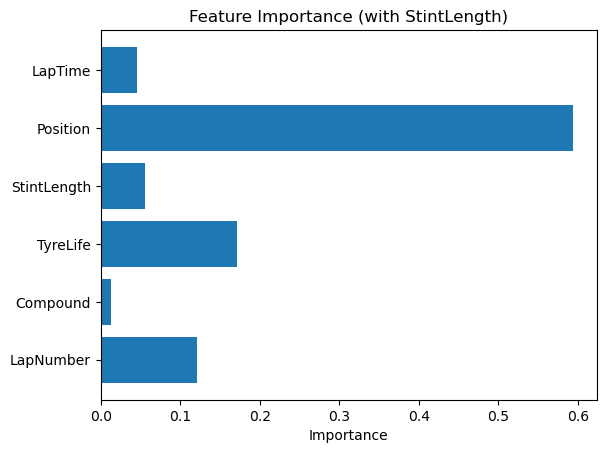

In [75]:

plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance (with StintLength)")
plt.show()


In [79]:
features_no_stint = [
    "LapNumber",
    "Compound",
    "TyreLife",
    "Position",
    "LapTime"
]
features_with_stint = [
    "LapNumber",
    "Compound",
    "TyreLife",
    "StintLength",
    "Position",
    "LapTime"
]
y = df["Pit"]


In [80]:
from sklearn.model_selection import train_test_split

X_train_idx, X_test_idx = train_test_split(
    df.index,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [81]:
X_train_no = df.loc[X_train_idx, features_no_stint]
X_test_no  = df.loc[X_test_idx, features_no_stint]

X_train_st = df.loc[X_train_idx, features_with_stint]
X_test_st  = df.loc[X_test_idx, features_with_stint]

y_train = y.loc[X_train_idx]
y_test  = y.loc[X_test_idx]


In [82]:

def train_model(X_tr, y_tr):
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight="balanced",
        random_state=42
    )
    model.fit(X_tr, y_tr)
    return model


In [83]:
model_no_stint = train_model(X_train_no, y_train)
model_with_stint = train_model(X_train_st, y_train)


In [84]:
from sklearn.metrics import classification_report

print(" WITHOUT STINT ")
print(classification_report(y_test, model_no_stint.predict(X_test_no)))

print("\n WITH STINT ")
print(classification_report(y_test, model_with_stint.predict(X_test_st)))


 WITHOUT STINT 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       201
           1       0.86      0.60      0.71        10

    accuracy                           0.98       211
   macro avg       0.92      0.80      0.85       211
weighted avg       0.97      0.98      0.97       211


 WITH STINT 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       201
           1       0.83      0.50      0.62        10

    accuracy                           0.97       211
   macro avg       0.90      0.75      0.81       211
weighted avg       0.97      0.97      0.97       211



In [86]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

def pit_metrics(model, X_test, y_test):
    p, r, f, _ = precision_recall_fscore_support(
        y_test,
        model.predict(X_test),
        labels=[1]
    )
    return p[0], r[0], f[0]

results = pd.DataFrame({
    "Model": ["Without Stint", "With Stint"],
    "Precision (Pit)": [
        pit_metrics(model_no_stint, X_test_no, y_test)[0],
        pit_metrics(model_with_stint, X_test_st, y_test)[0]
    ],
    "Recall (Pit)": [
        pit_metrics(model_no_stint, X_test_no, y_test)[1],
        pit_metrics(model_with_stint, X_test_st, y_test)[1]
    ],
    "F1-score (Pit)": [
        pit_metrics(model_no_stint, X_test_no, y_test)[2],
        pit_metrics(model_with_stint, X_test_st, y_test)[2]
    ]
})

results


,Model,Precision (Pit),Recall (Pit),F1-score (Pit)
0,Without Stint,0.857143,0.6,0.705882
1,With Stint,0.833333,0.5,0.625000


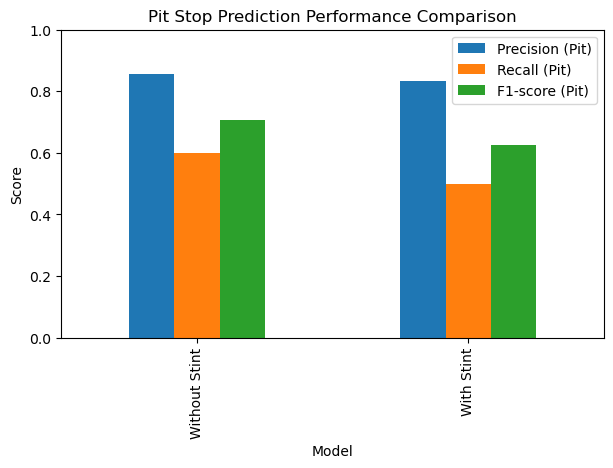

In [87]:
results.set_index("Model").plot(
    kind="bar",
    figsize=(7,4),
    ylim=(0,1),
    title="Pit Stop Prediction Performance Comparison"
)
plt.ylabel("Score")
plt.show()
